In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
SEED = 0

In [2]:
data = np.load("pca_data.npz")["data"]
#data = np.array([[2.5,2.4],[0.5,0.7],[2.2,2.9],[1.9,2.2],[3.1,3.0],[2.3,2.7],[2.0,1.6],[1.0,1.1],[1.5,1.6],[1.1,0.9]])

In [3]:
'''
scaler = StandardScaler()
data = scaler.fit_transform(data)
'''

'\nscaler = StandardScaler()\ndata = scaler.fit_transform(data)\n'

PCA Implementation without scikit learn

In [4]:
def PCA_custom(X,n_components):
    X_center = np.subtract(X, np.mean(X, axis=0))
    covariance_matrix = np.cov(X_center.T)
    eigenvalue,eigenvector = np.linalg.eig(covariance_matrix)
    #print(eigenvalue)
    sorted_indices = np.argsort(eigenvalue)[::-1][:n_components]
    pca_components = eigenvector[:,sorted_indices]
    return pca_components,eigenvalue


In [5]:
pca,explained_var = PCA_custom(data,2)
print(pca)
print(explained_var)

[[ 0.83774478 -0.54606197]
 [ 0.54606197  0.83774478]]
[2.48467365 0.40390296]


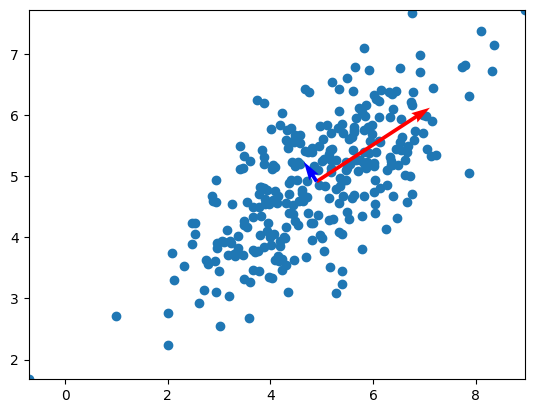

In [6]:
plt.scatter(data[:,0], data[:,1])
plt.quiver(np.mean(data[:,0]), np.mean(data[:,1]), pca[0,0], pca[1,0], scale=1/explained_var[0],scale_units='xy', color='r')
plt.quiver(np.mean(data[:,0]), np.mean(data[:,1]), pca[0,1], pca[1,1], scale=1/explained_var[1],scale_units='xy', color='b')
plt.xlim(min(data[:, 0]), max(data[:, 0]))
plt.ylim(min(data[:, 1]), max(data[:, 1]))
plt.show()